<a href="https://colab.research.google.com/github/fvictoire/dataiqtest/blob/master/Developing_Automated_Trading_Systems_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/auquan

This give you the final trading action, for example: buy X number of shares of company Y at below Z price, that you an send to your broker

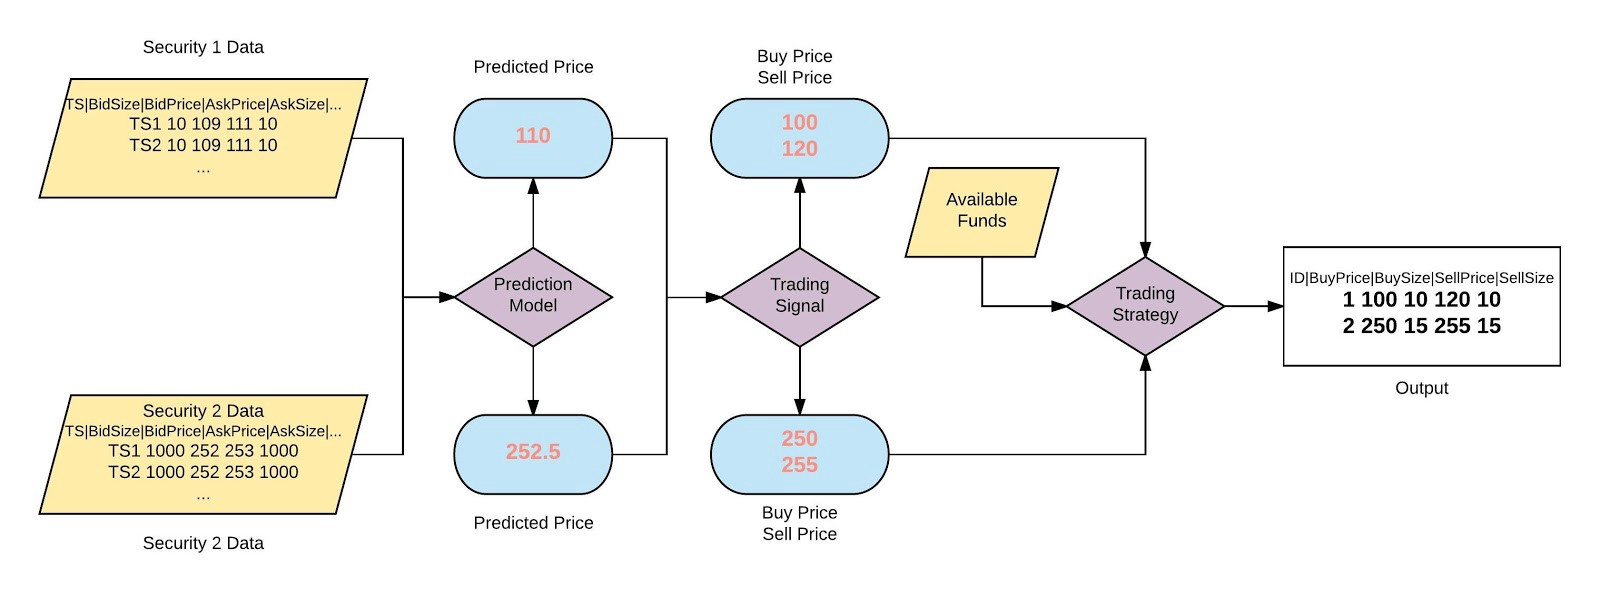

## 1. FIND THE RIGHT MARKET TO TRADE

> We have real time price data for multiple securities

Using ML to create a Trading Strategy Signal — Data Mining

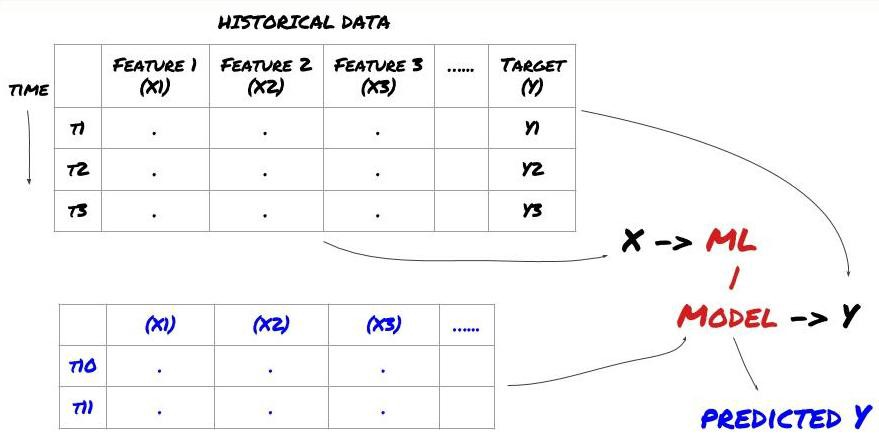

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
from google.colab import files
uploaded = files.upload()

Saving AC.PA.csv to AC.PA (1).csv


In [43]:
import pandas as pd
import io
#np.set_printoptions(precision=3, suppress=True)
dataset = pd.read_csv(io.StringIO(uploaded['AC.PA.csv'].decode('utf-8')))
df = dataset.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-11-02,40.990002,41.480000,40.799999,41.049999,39.851376,744418
1,2018-11-05,41.000000,41.230000,40.799999,40.849998,39.657215,564787
2,2018-11-06,40.790001,40.939999,40.560001,40.650002,39.463058,837226
3,2018-11-07,40.790001,40.799999,40.389999,40.660000,39.472763,827564
4,2018-11-08,40.790001,41.049999,40.020000,40.160000,38.987362,1299275


## Feature Engineering

The golden rule of feature selection is that the predictive power should come from primarily from the features and not from the model

*   Maximal information coefficient
*   Principal Component Analysis



In [44]:
import numpy as np
df = df.rename(columns = {"Adj Close": "Adj_Close"})
df = df.dropna()
#df['H-L'] = df.loc[:,'High'] - df.loc[:,'Low']
#df['O-C'] = df.loc[:,'Close'] - df.loc[:,'Open']
df['5day_MA'] = df.loc[:,'Close'].shift(1).rolling(window = 5).mean()
#df['10day_MA'] = df.loc[:,'Close'].shift(1).rolling(window = 10).mean()
#df['30day_MA'] = df.loc[:,'Close'].shift(1).rolling(window = 30).mean()
#df['Std_dev'] = df.loc[:,'Close'].rolling(5).std()
#df['Price_Rise'] = np.where(df.loc[:,'Close'].shift(-1) > df.loc[:,'Close'], 1, 0)
df

,Date,Open,High,Low,Close,Adj_Close,Volume,5day_MA
0,2018-11-02,40.990002,41.480000,40.799999,41.049999,39.851376,744418,NaN
1,2018-11-05,41.000000,41.230000,40.799999,40.849998,39.657215,564787,NaN
2,2018-11-06,40.790001,40.939999,40.560001,40.650002,39.463058,837226,NaN
3,2018-11-07,40.790001,40.799999,40.389999,40.660000,39.472763,827564,NaN
4,2018-11-08,40.790001,41.049999,40.020000,40.160000,38.987362,1299275,NaN
...,...,...,...,...,...,...,...,...
250,2019-10-28,38.520000,38.910000,38.500000,38.759998,38.759998,557550,38.478000
251,2019-10-29,38.639999,39.259998,38.639999,39.080002,39.080002,528875,38.449999
252,2019-10-30,38.970001,39.099998,38.299999,38.340000,38.340000,659140,38.652000
253,2019-10-31,38.500000,38.669998,37.880001,38.520000,38.520000,816076,38.679999


In [60]:
#print(df.info())
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
y.dropna(inplace=True)
#X = df.drop(["Price_Rise","Date","Open","High","Low","Close"], axis=1)
y

5      40.674000
6      40.424000
7      40.114000
8      39.980000
9      39.889999
         ...    
250    38.478000
251    38.449999
252    38.652000
253    38.679999
254    38.660000
Name: 5day_MA, Length: 250, dtype: float64

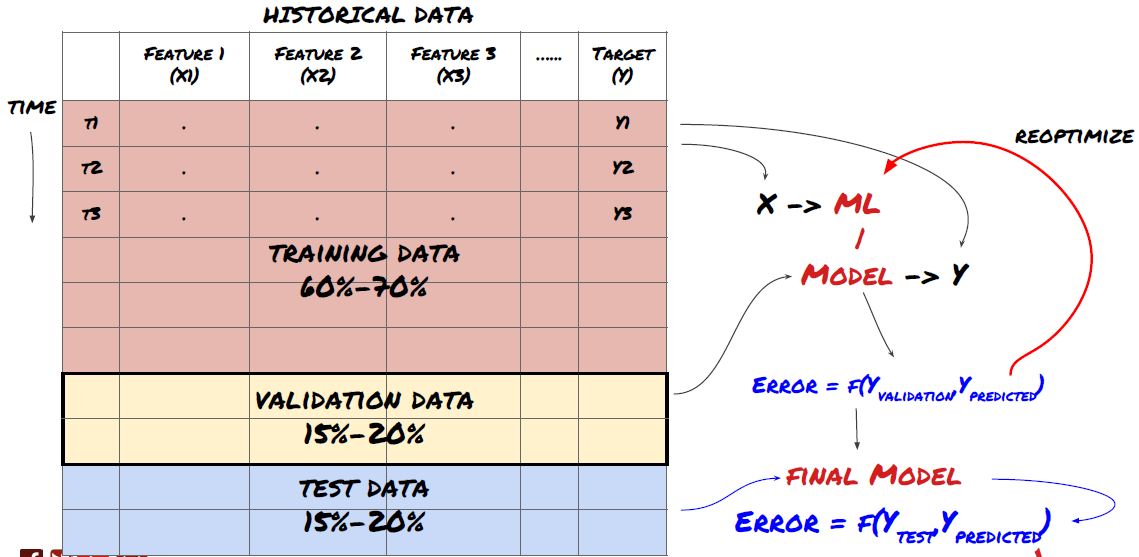

In [0]:
from sklearn.model_selection import train_test_split
#x_train,x_test,y_train,y_test=train_test_split(X ,y, test_size=0.4, random_state=123)
#x_train,x_test,y_train,y_test=train_test_split(x_train, y_train, test_size=0.2, random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

# Feature Transformation/Normalization

NA

## 2. BUILD YOUR FEATURES AND TRADING SIGNAL



> DIRECTION — This data feed get analyzed by our prediction model

> you could predict the probability that price will go up(or down)





**Model** **Selection** Choose an appropriate statistical/ML model based on chosen problem

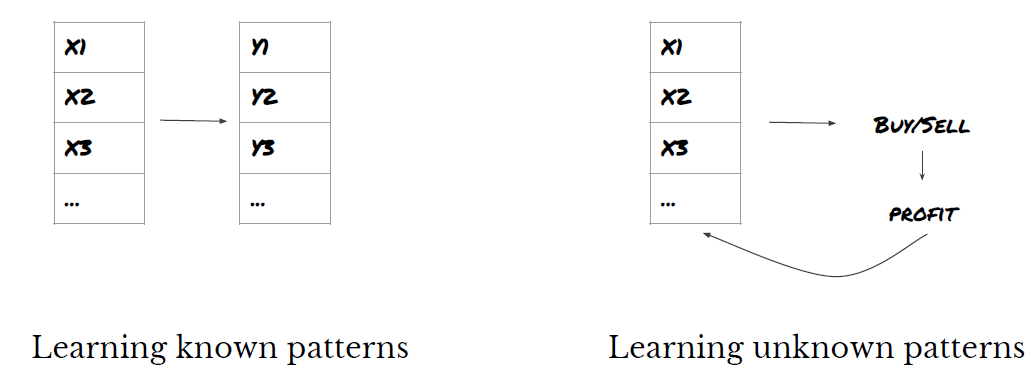

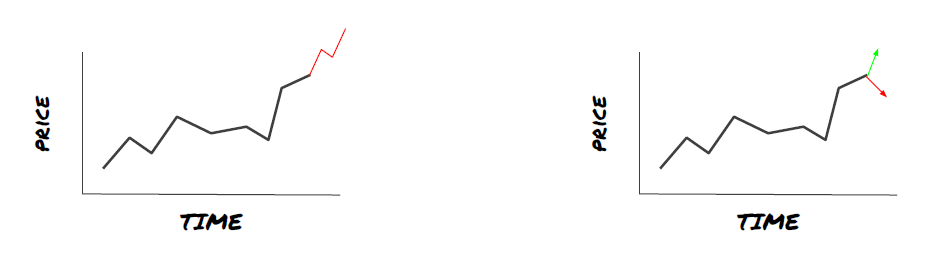

Coefficients: 
 [ 4.72422587e-01  6.59755707e-01  2.99612300e-01 -4.36412012e-01
 -9.62117310e-02  8.78231934e-08]
Mean squared error: 0.42
Variance score: 0.73


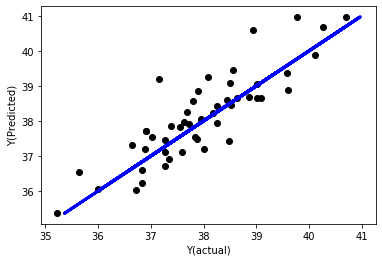

(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 array([39.09643242, 38.62352512, 37.03063386, 37.87668012, 37.55285905,
        37.88643907, 38.18326444, 37.5950207 , 40.69993091, 40.11750288,
        37.681976  , 37.63391138, 37.95764822, 39.76643076, 35.21402441,
        37.26190808, 38.94310137, 39.00303079, 38.25339939, 38.07785344,
        37.80513508, 36.72033457, 36.89814977, 37.15009494, 37.37818003,
        37.72748971, 38.52591315, 37.95666598, 36.83762242, 39.00414814,
        38.25108511, 37.84091119, 38.44724548, 39.57832982, 38.010792  ,
        36.91731804, 37.2614429 , 35.63202138, 38.55743463, 38.47809164,
        38.85585082, 38.50284817, 36.90552301, 37.34998665, 35.99412968,
        37.26266923, 36.8398234 , 39.60027366, 36.64361096, 40.25251467]))

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

def linear_regression(basis_X_train, basis_y_train, basis_X_test, basis_y_test):
    
    regr = linear_model.LinearRegression()
    # Train the model using the training sets
    regr.fit(basis_X_train, basis_y_train)
    # Make predictions using the testing set
    basis_y_pred = regr.predict(basis_X_test)
    # The coefficients
    print('Coefficients: \n', regr.coef_)
    
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(basis_y_test, basis_y_pred))
    
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(basis_y_test, basis_y_pred))
    # Plot outputs
    plt.scatter(basis_y_pred, basis_y_test,  color='black')
    plt.plot(basis_y_test, basis_y_test, color='blue', linewidth=3)
    plt.xlabel('Y(actual)')
    plt.ylabel('Y(Predicted)')
    plt.show()
    
    return regr, basis_y_pred 
    
linear_regression(X_train, y_train, X_test, y_test)

## Normalization

In [95]:
y_test.shape

(50,)

In [96]:
basis_y_pred.shape

(21,)

Coefficients: 
 [ 0.19515971  0.90427792  0.31519815 -0.48032318 -0.05067345  0.01352412]
Mean squared error: 0.27
Variance score: 0.75


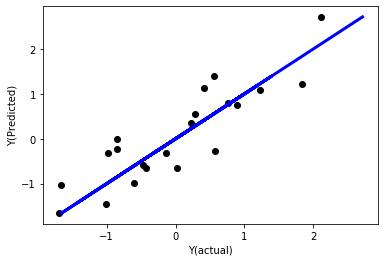

In [97]:
def normalize(basis_X, basis_y, period):
    basis_X_norm = (basis_X - basis_X.rolling(period).mean())/basis_X.rolling(period).std()
    basis_X_norm.dropna(inplace=True)
    basis_y_norm = (basis_y - basis_X['Close'].rolling(period).mean())/basis_X['Close'].rolling(period).std()
    basis_y_norm = basis_y_norm[basis_X_norm.index]
    
    return basis_X_norm, basis_y_norm
norm_period = 30
basis_X_norm_test, basis_y_norm_test = normalize(X_test,y_test, norm_period)
basis_X_norm_train, basis_y_norm_train = normalize(X_train, y_train, norm_period)
#regr_norm, basis_y_pred = 
linear_regression(basis_X_norm_train, basis_y_norm_train, basis_X_norm_test, basis_y_norm_test)

# The mean squared error
# print("Mean squared error: %.2f" % mean_squared_error(y_test, basis_y_pred))
    
# Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % r2_score(y_test, basis_y_pred))

basis_y_pred = basis_y_pred * X_test['Close'].rolling(norm_period).std()[basis_y_norm_test.index] + X_test['Close'].rolling(norm_period).mean()[basis_y_norm_test.index]


## correlation between different features

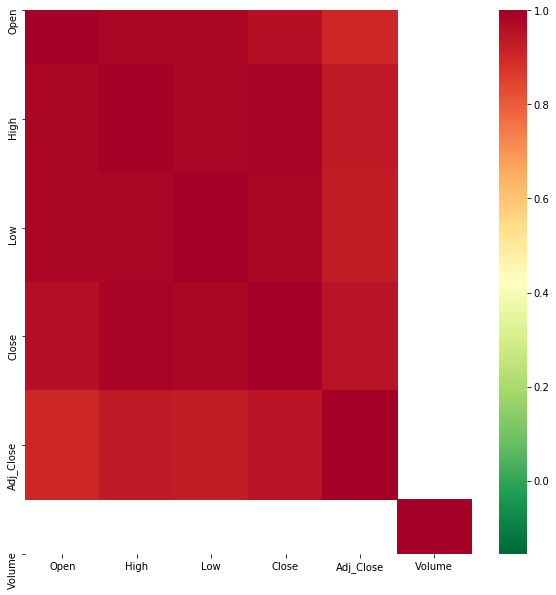

In [98]:
import seaborn
c = X_train.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(c, cmap='RdYlGn_r', mask = (np.abs(c) <= 0.8))
plt.show()

3. TRADE EXECUTION STRATEGY

4. TRADING COSTS

We use 0.10 per stock as commission and 5% of the stock’s daily range as an estimate of slippage. Therefore, total cost to trade (in$) = 0.10 + (HIGH — LOW) * 0.05

5. BACKTESTING AND PERFORMANCE METRICS

Total Return
Annualized Return
Annualized Volatility
Sharpe Ratio
Sortino Ratio
Maximum Drawdown
% Profitability
Profit Factor